In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
## Data Merge and Read

#df = pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./SalesAnalysis/Sales_Data/')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)


In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,4/2/2019 7:46,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,4/12/2019 10:58,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,4/8/2019 14:05,"83 7th St, Boston, MA 02215"


In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how = 'all')


In [5]:
all_data = all_data[all_data['Order Date'] != 'Order Date']

In [6]:
### Best month for sale and how much earning?
# month conversion

all_data['Month'] = all_data['Order Date'].str.split('/').str[0]

all_data['Month'] = all_data['Month'].astype('int32')

In [7]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data ['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [9]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


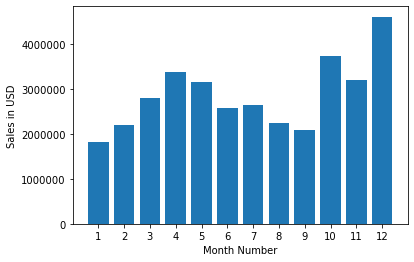

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

In [11]:
### What city have highest sales?

results = all_data.groupby('City').sum()

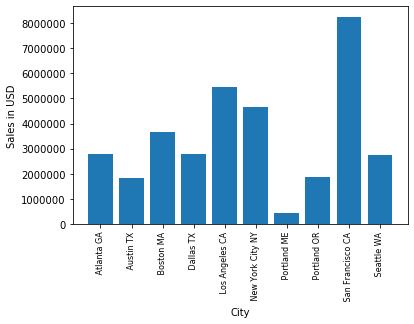

In [12]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])

plt.xticks(cities, rotation = 'vertical', size = 8 )
plt.ylabel('Sales in USD')
plt.xlabel('City')

plt.show()

In [ ]:
### good time for advertisement ?? 

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.grid()
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")

plt.show()

In [ ]:
## Nature of Products Sold Together?

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [ ]:
### What product sold most?

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation = 'vertical', size = 8)

plt.show()


In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'r--')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')

ax2.set_ylabel('Price in USD',color = 'r')

ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()
